### Introduction
This is a project named 'Unicorn Startups Analysis', which is carried out by using Python programming language. The following sections for data analysis are covered in this project:

Data preparation
Data Cleaning
Data Analysis
Analysis Insights
This data has been proposed in the Kaggle platform under this license

"Unicorn" is a term used in the venture capital industry to describe a privately held startup company with a value of over USD 1 billion. The term was first popularized by venture capitalist Aileen Lee, founder of Cowboy Ventures, a seed-stage venture capital fund based in Palo Alto, California. It is worth noting that the company is not considered a unicorn if it is no longer venture-backed because it goes public or is acquired, or if its value falls below the USD 1 billion thresholds.

### Objective¶
The objective of this project is to reveal some insights about Unicorn Startups as the following:

Determination of the most valuable companies and industries
Segmentation of the overall market by share of each industry
Revealing the list of top countries known as the birthplace of unicorns
Yearly valuation comparison of Top 3 countries
Analyzing growth trends in the overall market
Figuring out the most successful investors by the number of unicorns

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
sns.set(rc={"figure.figsize" :(15,6.5)})

In [5]:
unicorns = pd.read_csv("C:/Users/Irtaza Hussain/Downloads/Data Analysis/Project/unicorns till sep 2022.csv")
unicorns.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [8]:
unicorns.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [10]:
unicorns.info()
unicorns.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
Company           1186 non-null object
Valuation ($B)    1186 non-null object
Date Joined       1186 non-null object
Country           1186 non-null object
City              1186 non-null object
Industry          1186 non-null object
Investors         1168 non-null object
dtypes: object(7)
memory usage: 65.0+ KB


Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

As per the above output, we can see that there are null values for the 'Investors' column. In addition, let's check the 'industry' and 'country' columns if there is any data inaccuracy and duplications:

In [11]:
unicorns.Industry.value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

In [13]:
unicorns.Country.value_counts()

United States           636
China                   174
India                    70
United Kingdom           46
Germany                  29
France                   24
Israel                   22
Canada                   19
South Korea              17
Brazil                   17
Singapore                13
Sweden                    8
Australia                 8
Mexico                    8
Hong Kong                 7
Indonesia                 7
Netherlands               7
Switzerland               6
Ireland                   6
Japan                     6
Norway                    5
Finland                   4
Spain                     4
Belgium                   3
Turkey                    3
United Arab Emirates      3
Colombia                  3
Estonia                   2
Denmark                   2
Thailand                  2
Lithuania                 2
Vietnam                   2
Austria                   2
Philippines               2
South Africa              2
Chile               

In [14]:
unicorns.duplicated().value_counts()

False    1186
dtype: int64

There is observed inaccuracy in the data for the 'Industry' column for records between 'Artificial Intelligence' and 'Artificial intelligence' as well as misplacement of the data.

As per the initial exploration of the data, the following steps should be taken as the part of Data Cleaning process:

* Renaming column names using Snake Case approach, as some columns contain unnecessary spaces
* Converting the 'Valuation ($B)' column to float, and 'Date Joined' to datetime formats
* Extracting year data from the 'Date Joined' column for better visualizations
* Sorting out missing values in the 'investors' column and fixing misplacement of the data
* Splitting multiple investors across multiple columns
* Sorting out data inaccuracy in the 'Industry' column

### 2. Data Cleaning
We need to rename the column names by using Snake Case approach, in the following way:

In [15]:
unicorns.rename(lambda x: x.lower().strip().replace(" ","_"),axis = "columns",inplace=True)
unicorns.columns

Index(['company', 'valuation_($b)', 'date_joined', 'country', 'city',
       'industry', 'investors'],
      dtype='object')

Now, let's remove the USD sign in the 'valuation_($b)' column and convert it to the float type, as well as convert the 'date_joined' column to datetime format:

In [17]:
unicorns["valuation_($b)"] = unicorns["valuation_($b)"].str.replace("$", "",regex=False).astype(float)
unicorns["year"] = pd.to_datetime(unicorns["date_joined"]).dt.year
unicorns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 8 columns):
company           1186 non-null object
valuation_($b)    1186 non-null float64
date_joined       1186 non-null object
country           1186 non-null object
city              1186 non-null object
industry          1186 non-null object
investors         1168 non-null object
year              1186 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 74.2+ KB


As we mentioned above we have some missing values in the investor columns

In [18]:
unicorns[unicorns["investors"].isna()]

,company,valuation_($b),date_joined,country,city,industry,investors,year
10,FTX,32.00,7/20/2021,Bahamas,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",NaN,2021
242,HyalRoute,3.50,5/26/2020,Singapore,Mobile & telecommunications,Kuang-Chi,NaN,2020
316,Amber Group,3.00,6/21/2021,Hong Kong,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve...",NaN,2021
346,Moglix,2.60,5/17/2021,Singapore,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway",NaN,2021
371,Coda Payments,2.50,4/15/2022,Singapore,Fintech,"GIC. Apis Partners, Insight Partners",NaN,2022
482,Advance Intelligence Group,2.00,9/23/2021,Singapore,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund",NaN,2021
495,Trax,2.00,7/22/2019,Singapore,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T...",NaN,2019
865,Carousell,1.10,9/15/2021,Singapore,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent...",NaN,2021
917,LinkSure Network,1.00,1/1/2015,China,Shanghai,Mobile & telecommunications,NaN,2015
941,WeLab,1.00,11/8/2017,Hong Kong,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene...",NaN,2017


In [20]:
unicorns.loc[unicorns["company"]=="LinkSure Network","investors"] = "Haitong Kaiyuan Investment, Northern Light Venture Capita"

Now, we can fix the misplacement of the data:

In [22]:
unicorns['investors'].fillna(unicorns['industry'], inplace = True)
unicorns.loc[unicorns['investors'] == unicorns['industry'], 'industry'] = unicorns['city']
unicorns.loc[unicorns['city'] == unicorns['industry'], 'city'] = unicorns['country']

It is better to split the multiple investors across multiple columns:

In [24]:
unicorns[["investor_1", "investor_2","investor_3","investor_4"]] = unicorns["investors"].str.split(",",expand =True)
unicorns.drop(columns = "investors", inplace=True)

Finally, there is the inaccuracy of data between 'Artificial Intelligence' and 'Artificial intelligence' in the 'industry' column, which can be fixed in the following way:

In [26]:
unicorns["industry"] = unicorns["industry"].str.replace("Artifical Intelligence", "Artifical intelligence")
unicorns.industry.value_counts()

Fintech                                246
Internet software & services           226
E-commerce & direct-to-consumer        107
Health                                  94
Artificial intelligence                 76
Supply chain, logistics, & delivery     66
Other                                   65
Cybersecurity                           58
Data management & analytics             45
Auto & transportation                   40
Mobile & telecommunications             38
Hardware                                38
Edtech                                  32
Consumer & retail                       28
Travel                                  14
Artificial Intelligence                 11
Internet                                 2
Name: industry, dtype: int64

Thus, we have fully cleaned our data for further analysis:

In [27]:
unicorns.head()

,company,valuation_($b),date_joined,country,city,industry,year,investor_1,investor_2,investor_3,investor_4
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,2018,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,2014,Khosla Ventures,LowercaseCapital,capitalG,None
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,2018,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None


### 3. Data Analysis
In this Analysis, we will identify the main insights from this data such as the determination of most valuable companies and industries, segmentation of the overall market by share of each industry, revealing the list of top countries known as the birthplace of unicorns, yearly valuation comparison of Top 3 countries, analyzing growth trends in the overall market, figuring out most successful investors by a number of unicorns.

3.1 Top companies and industries by valuation
First of all, let's identify the top 10 valuable companies and industries accordingly:

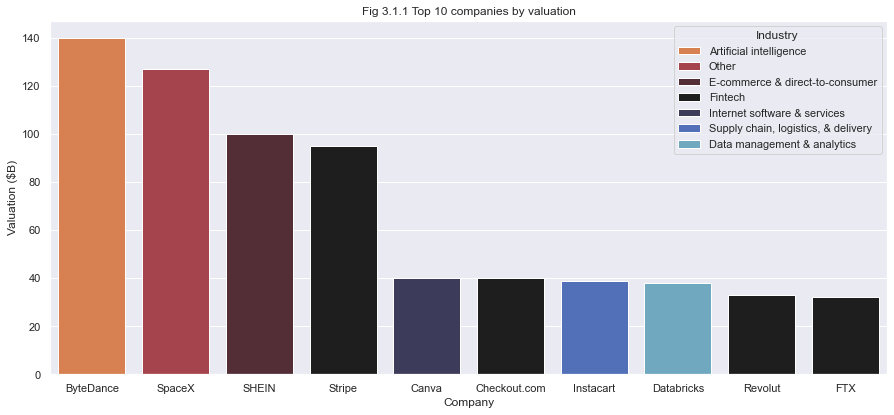

In [30]:
top_companies = unicorns.sort_values(by= "valuation_($b)", ascending =False).head(10)
fig=sns.barplot(data= top_companies , x= "company", y = "valuation_($b)", hue ="industry", dodge =False , palette = "icefire_r")
tickes = fig.set_xticklabels(fig.get_xticklabels())
label  = fig.set(xlabel= "Company" , ylabel="Valuation ($B)", title= "Fig 3.1.1 Top 10 companies by valuation")
legend = plt.legend(title = "Industry" , loc ="upper right")

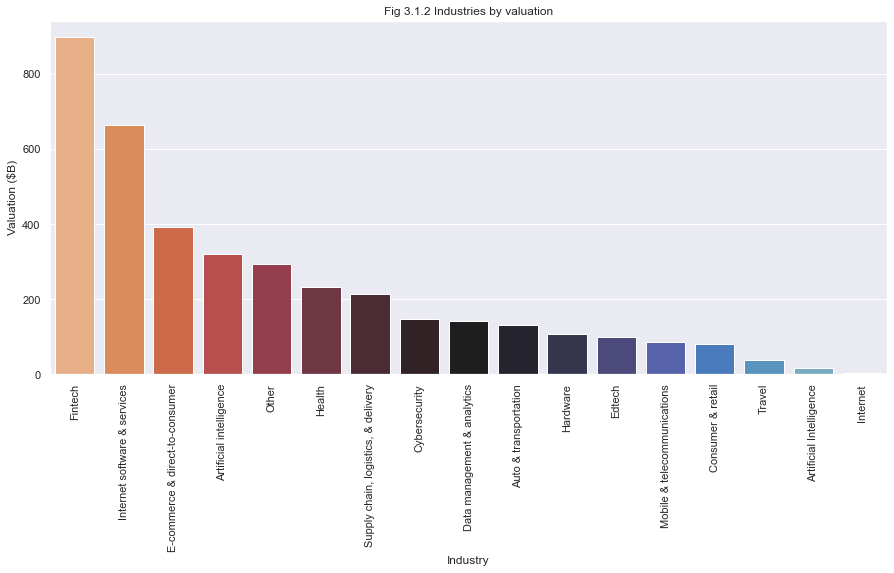

In [31]:
top_industries = unicorns.groupby(by ='industry').sum().sort_values(by ='valuation_($b)', ascending=False)

fig = sns.barplot(data = top_industries, x = top_industries.index, y = 'valuation_($b)',
                  dodge=False, palette = 'icefire_r')
ticks = fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
labels = fig.set(xlabel ="Industry", ylabel = "Valuation ($B)", title ='Fig 3.1.2 Industries by valuation')

#### 3.2 Segmentation of the market by industries
Now, let's look into the segmentation of the overall market by the share of each industry:

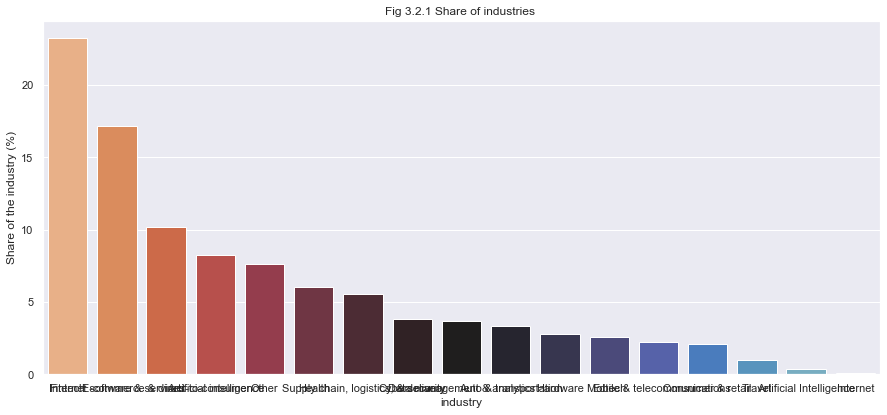

In [34]:
industry_share = top_industries [ "valuation_($b)"].apply(lambda x:(x/top_industries.sum())*100).round(2)


fig= sns.barplot(data= industry_share, x=industry_share.index, y = "valuation_($b)", dodge = False , palette = "icefire_r")

ticks= fig.set(xlabel= "industry" , ylabel= "Share of the industry (%)", title = "Fig 3.2.1 Share of industries ")

#### 3.3 Country-wise analysis
Let's look into the top 10 countries by valuation known as birthplace of unicorns:

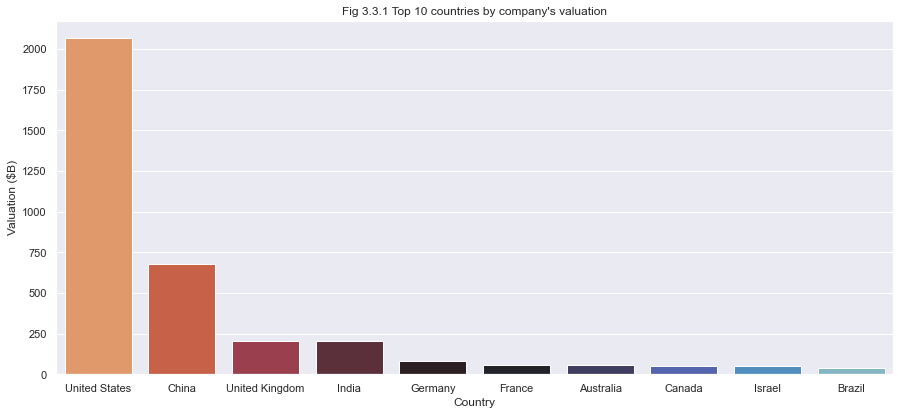

In [38]:
top_countries = unicorns.groupby(by = "country").sum().sort_values(by= "valuation_($b)", ascending = False).head(10)


fig = sns.barplot(data = top_countries , x= top_countries.index, y= "valuation_($b)", dodge = False , palette = "icefire_r")

ticks= fig.set_xticklabels(fig.get_xticklabels())
labels = fig.set(xlabel ="Country", ylabel = "Valuation ($B)", title ="Fig 3.3.1 Top 10 countries by company's valuation")


We can also analyse countries by the overall number of unicorns:

In [39]:
countries_count= unicorns["country"].value_counts().head(10)
countries_count = pd.DataFrame(countries_count)

countries_count.rename({"country":"counts"}, axis =1, inplace = True)
countries_count

,counts
United States,636
China,174
India,70
United Kingdom,46
Germany,29
France,24
Israel,22
Canada,19
South Korea,17
Brazil,17


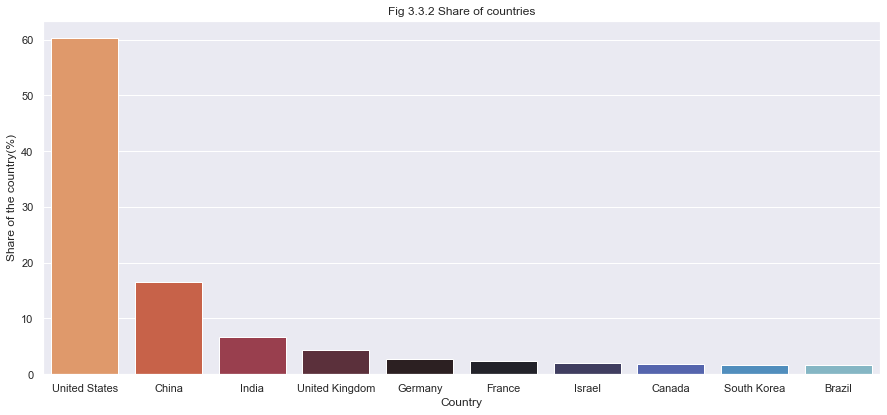

In [40]:
countries_share = countries_count['counts'].apply(lambda x: (x/countries_count.counts.sum())*100).round(2)
countries_share = pd.DataFrame(countries_share)
fig = sns.barplot(data = countries_share, x = countries_share.index, y = 'counts',
                  dodge=False, palette = 'icefire_r')
ticks = fig.set_xticklabels(fig.get_xticklabels())
labels = fig.set(xlabel ="Country", ylabel = "Share of the country(%)", title ="Fig 3.3.2 Share of countries")

#### 3.4 Comparing Top 3 Countries
From the above analysis, we can conclude that the top 3 countries by the number of unicorns are the United States, China, and India. Since the data is covering the period only till September 2022, we will filter out this year for a more objective comparison. Let's compare these countries by yearly valuation:

In [42]:
unicorns_us = unicorns[(unicorns["country"]=="United States") & (unicorns["year"]<2022)]
unicorns_china = unicorns [(unicorns["country"] == "China") & (unicorns["year"]<2022)]
unicorns_india = unicorns[(unicorns["country"]=="India") & (unicorns["year"]<2022)]

value_us = unicorns_us.groupby("year")["valuation_($b)"].sum().reset_index()
value_china = unicorns_china.groupby("year")["valuation_($b)"].sum().reset_index()
value_india = unicorns_india.groupby('year')['valuation_($b)'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=value_us["year"], y=value_us["valuation_($b)"], mode="lines+markers", name= "United States", line = dict(color = "midnightblue")))
fig.add_trace(go.Scatter(x=value_china['year'], y=value_china['valuation_($b)'],
                         mode='lines+markers', name='China', line = dict(color = 'sienna')))
fig.add_trace(go.Scatter(x=value_india['year'], y=value_india['valuation_($b)'],
                         mode='lines+markers', name='India', line = dict(color = 'darkorange')))

fig.update_layout(
    title = 'Fig 3.4.1 Yealy valuation comparison for Top 3 countries',
    title_x = 0.5,
    title_y = 0.85,
    xaxis_title = 'Year',
    yaxis_title = 'Valuation ($B)',
    xaxis = dict(
                 showline = True,
                 showgrid = False,
                 showticklabels = True,
                 linewidth = 2,
                 ticks = 'outside'),
    font=dict(
              family="sans-serif",
              size=8,
              color='black'),
    yaxis = dict(
                 showgrid = True,
                 showticklabels=True),
    plot_bgcolor='ghostwhite')

#### 3.5 Analyzing unicorns' growth
Firstly, let's look into the distribution of unicorns on yearly basis:

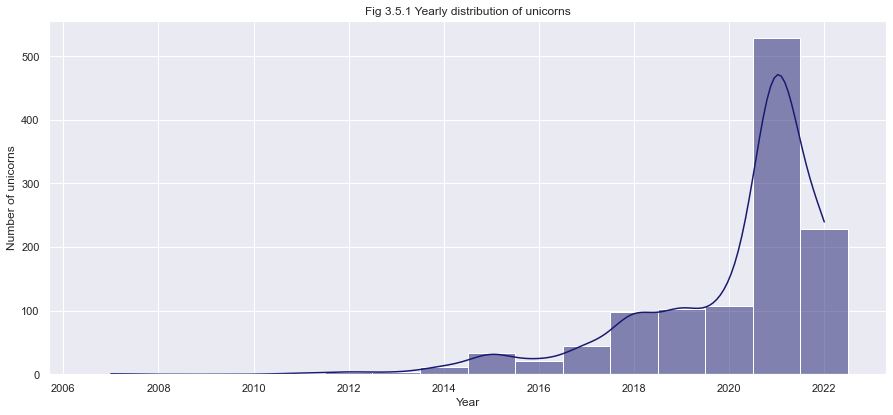

In [44]:
fig = sns.histplot(data = unicorns, x = 'year', discrete =True, kde =True, color = 'midnightblue')
labels = fig.set(xlabel ="Year", ylabel = "Number of unicorns", title ="Fig 3.5.1 Yearly distribution of unicorns")

Let's figure out the most growing industries among unicorns for the last 5 years:



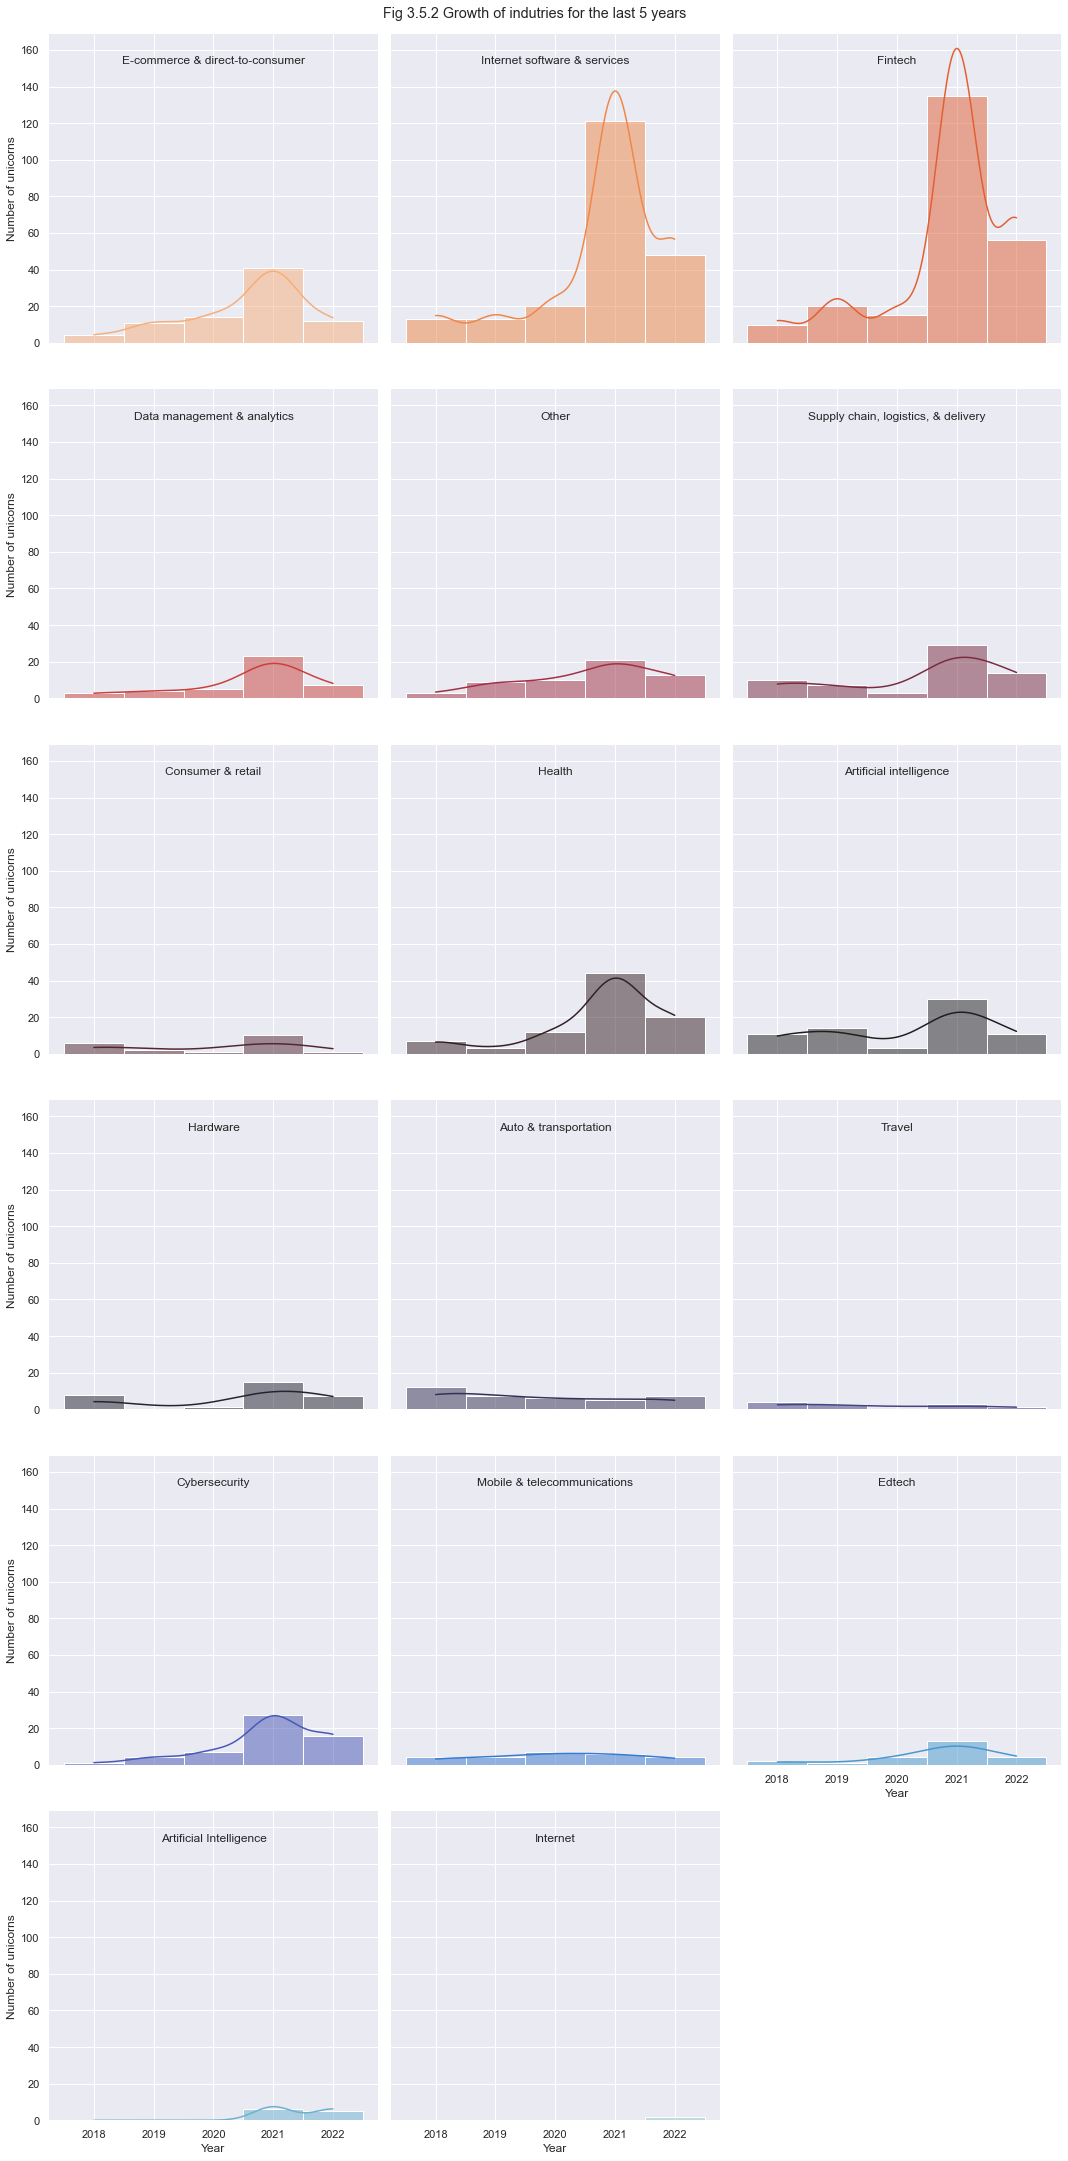

In [45]:
unicorns_2017 = unicorns[unicorns['year'] > 2017]
fig = sns.displot(data = unicorns_2017, x = 'year', hue = 'industry', kde=True,
                  discrete = True, palette = 'icefire_r', legend = False, height=5, 
                  col = 'industry',col_wrap = 3)
labels = fig.set(xlabel ="Year", ylabel = "Number of unicorns")
fig.fig.suptitle('Fig 3.5.2 Growth of indutries for the last 5 years', y = 1)
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=True)
fig.set_titles(size=12, pad=-30, row_template = '{row_name}', col_template = '{col_name}')

Finally, let's look into the birth and growth of companies along the years and segmented by industries

In [46]:
fig = px.scatter(unicorns,
                 x = 'year',
                 y = 'industry',
                 size = 'valuation_($b)',
                 color = 'industry',
                 hover_name = 'company',
                 size_max  = 30,
                 color_discrete_sequence=px.colors.qualitative.Antique)

fig.update_layout(
                  title = 'Fig 3.5.3 Birth and Growth of unicorns by valuation and industry',
                  title_x = 0.5,
                  title_y = 0.95,
                  xaxis_title = 'Year',
                  yaxis_title = 'Industry',
                  showlegend = False,
                  paper_bgcolor = 'ghostwhite',
                  plot_bgcolor = 'ghostwhite',
                  font=dict(
                            family="sans-serif",
                            size=8,
                            color='black'),
                  width = 800,
                  height = 700,
                  hovermode = 'closest')
fig.update_yaxes(visible=True)

### 3.6 Analyzing Investors
Finally, let's understand which investors are most successful in their decisions in terms of number of unicorns:

In [47]:
investors = pd.concat([unicorns['investor_1'],unicorns['investor_2'],
                       unicorns['investor_3'],unicorns['investor_4']],axis = 0)
investors.dropna(inplace=True)
investors.value_counts().nlargest(10)

 Tiger Global Management        42
 Accel                          34
Andreessen Horowitz             33
 Sequoia Capital                33
 Insight Partners               31
Sequoia Capital China           30
Accel                           29
 General Catalyst               27
 Andreessen Horowitz            26
 Lightspeed Venture Partners    25
dtype: int64

### 4. Analysis Insights
